In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [2]:
x_train=train_datagen.flow_from_directory(r"C:\Users\POOJITHA\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)


Found 11386 images belonging to 9 classes.


In [3]:
x_test=test_datagen.flow_from_directory(r"C:\Users\POOJITHA\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)


Found 3416 images belonging to 9 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [5]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [8]:
model.add(Dense(9,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
len(x_train)


475

In [10]:
1238/24

51.583333333333336

In [11]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
475/475 [==============================] - 767s 2s/step - loss: 1.1307 - accuracy: 0.6385 - val_loss: 0.5079 - val_accuracy: 0.8129
Epoch 2/10
475/475 [==============================] - 358s 754ms/step - loss: 0.5417 - accuracy: 0.8075 - val_loss: 0.5091 - val_accuracy: 0.8124
Epoch 3/10
475/475 [==============================] - 219s 461ms/step - loss: 0.4273 - accuracy: 0.8511 - val_loss: 0.3623 - val_accuracy: 0.8653
Epoch 4/10
475/475 [==============================] - 215s 452ms/step - loss: 0.3710 - accuracy: 0.8675 - val_loss: 0.3826 - val_accuracy: 0.8653
Epoch 5/10
475/475 [==============================] - 296s 623ms/step - loss: 0.3207 - accuracy: 0.8868 - val_loss: 0.3406 - val_accuracy: 0.8946
Epoch 6/10
475/475 [==============================] - 236s 497ms/step - loss: 0.2790 - accuracy: 0.9015 - val_loss: 0.2210 - val_accuracy: 0.9189
Epoch 7/10
475/475 [==============================] - 217s 457ms/step - loss: 0.2753 - accuracy: 0.9032 - val_loss: 0.2834 - va

In [12]:
model.save('vegetabledata.h5')

In [13]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [14]:
model=load_model('vegetabledata.h5')

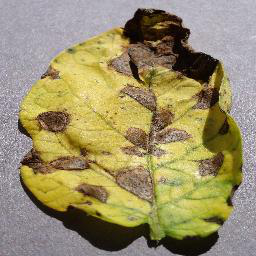

In [15]:
img=image.load_img(r"C:\Users\POOJITHA\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Potato___Early_blight\b7157976-61c2-4366-87c5-e3de23aa7c10___RS_Early.B 7227.JPG")
img

In [16]:
x=image.img_to_array(img)

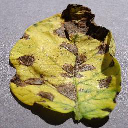

In [17]:
img=image.load_img(r"C:\Users\POOJITHA\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Potato___Early_blight\b7157976-61c2-4366-87c5-e3de23aa7c10___RS_Early.B 7227.JPG",target_size=(128,128))
img

In [18]:
x=image.img_to_array(img)
x

array([[[172., 169., 180.],
        [168., 165., 176.],
        [168., 165., 176.],
        ...,
        [191., 189., 200.],
        [180., 178., 189.],
        [192., 190., 201.]],

       [[174., 171., 182.],
        [169., 166., 177.],
        [161., 158., 169.],
        ...,
        [186., 184., 195.],
        [185., 183., 194.],
        [189., 187., 198.]],

       [[174., 171., 182.],
        [169., 166., 177.],
        [163., 160., 171.],
        ...,
        [181., 179., 190.],
        [188., 186., 197.],
        [182., 180., 191.]],

       ...,

       [[131., 121., 130.],
        [154., 144., 153.],
        [154., 147., 155.],
        ...,
        [138., 135., 146.],
        [145., 142., 153.],
        [154., 151., 162.]],

       [[142., 130., 140.],
        [128., 118., 127.],
        [135., 128., 136.],
        ...,
        [148., 145., 156.],
        [160., 157., 168.],
        [154., 151., 162.]],

       [[124., 112., 122.],
        [132., 122., 131.],
        [123., 1

In [19]:
x=np.expand_dims(x,axis=0)
x

array([[[[172., 169., 180.],
         [168., 165., 176.],
         [168., 165., 176.],
         ...,
         [191., 189., 200.],
         [180., 178., 189.],
         [192., 190., 201.]],

        [[174., 171., 182.],
         [169., 166., 177.],
         [161., 158., 169.],
         ...,
         [186., 184., 195.],
         [185., 183., 194.],
         [189., 187., 198.]],

        [[174., 171., 182.],
         [169., 166., 177.],
         [163., 160., 171.],
         ...,
         [181., 179., 190.],
         [188., 186., 197.],
         [182., 180., 191.]],

        ...,

        [[131., 121., 130.],
         [154., 144., 153.],
         [154., 147., 155.],
         ...,
         [138., 135., 146.],
         [145., 142., 153.],
         [154., 151., 162.]],

        [[142., 130., 140.],
         [128., 118., 127.],
         [135., 128., 136.],
         ...,
         [148., 145., 156.],
         [160., 157., 168.],
         [154., 151., 162.]],

        [[124., 112., 122.],
       

In [20]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 5s 5s/step


In [21]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [22]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Potato___Early_blight'

In [23]:
img=image.load_img(r"C:\Users\POOJITHA\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Potato___Early_blight\b7157976-61c2-4366-87c5-e3de23aa7c10___RS_Early.B 7227.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 109ms/step


'Potato___Early_blight'